In [21]:
print('hello, world!')

hello, world!


In [22]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [23]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [24]:
fetch_housing_data()

In [25]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [26]:
len(housing)

20640

In [27]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [28]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [29]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


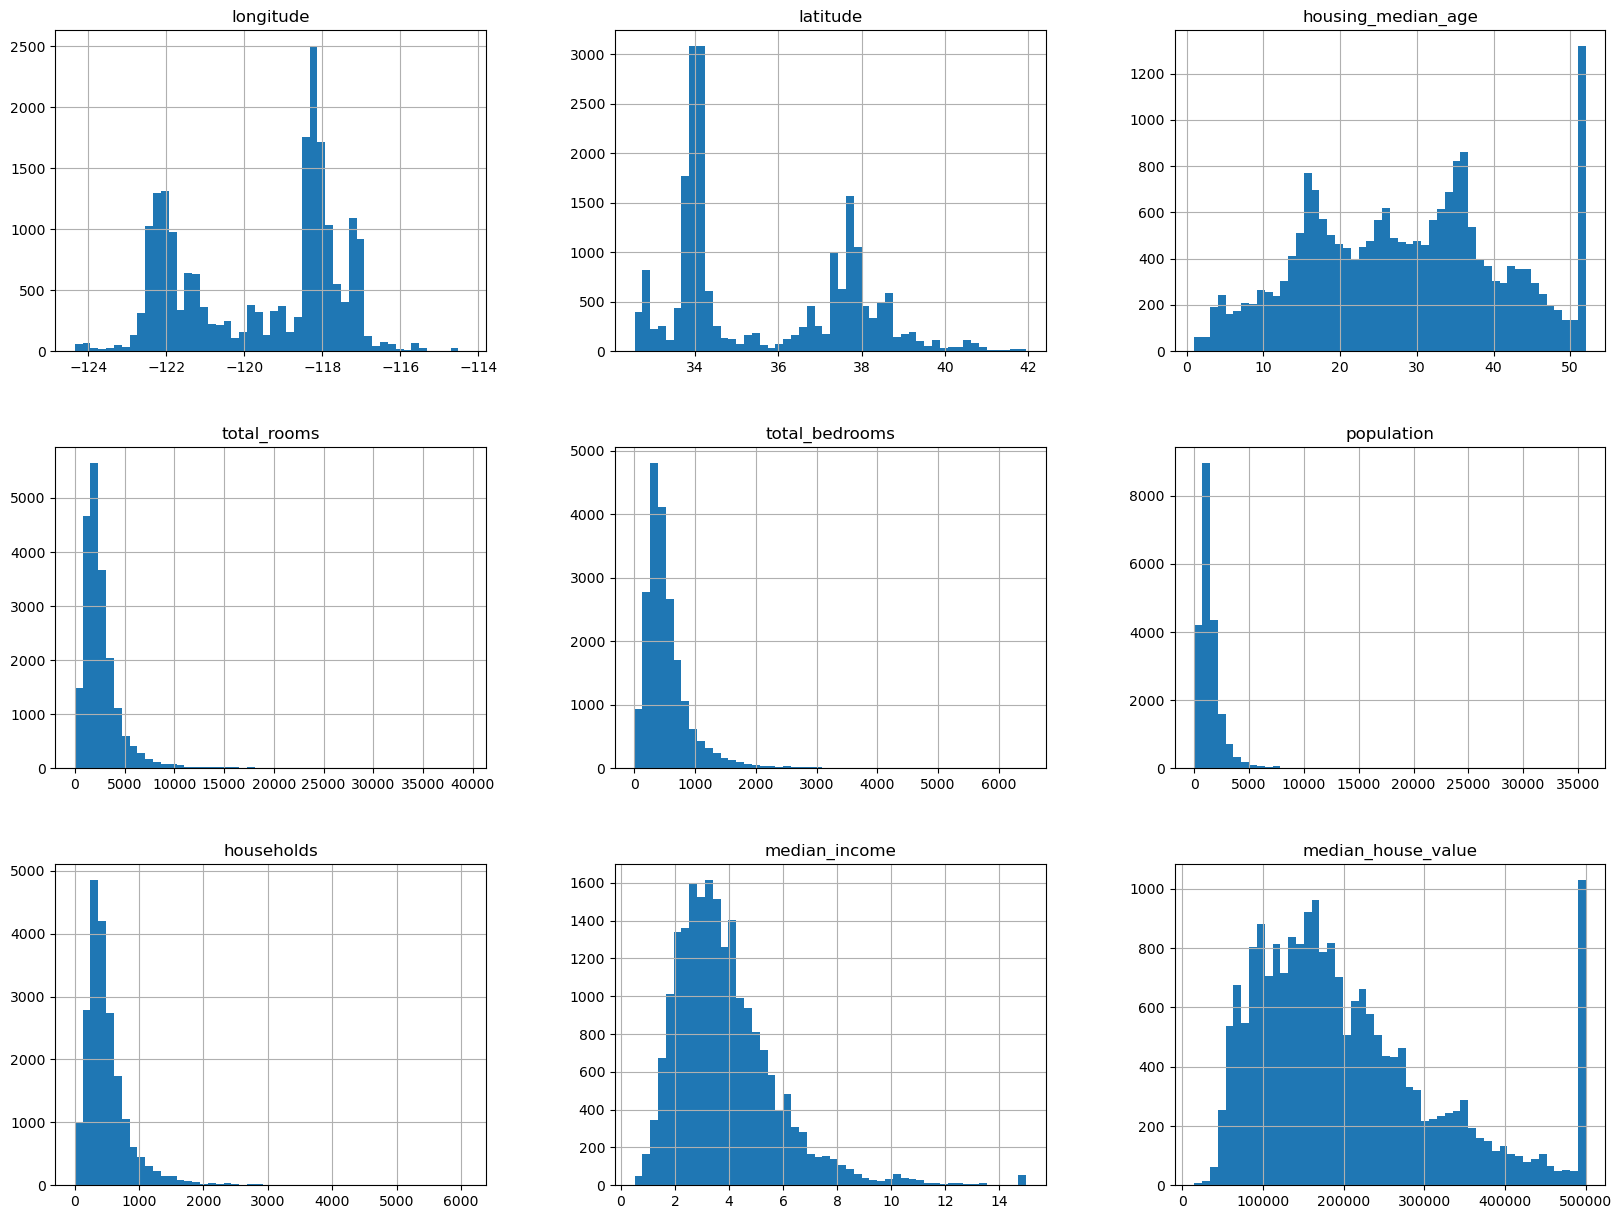

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [31]:
import numpy as np

def split_test_train(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size= int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
train_data, test_data = split_test_train(housing, 0.2)
print(len(train_data),'train +',len(test_data),'test')

16512 train + 4128 test


In [32]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16634,-120.84,35.31,23.0,3100.0,603.0,1515.0,609.0,2.8493,196100.0,NEAR OCEAN
18645,-121.98,36.96,20.0,3495.0,818.0,2186.0,772.0,3.1167,258300.0,NEAR OCEAN
13349,-117.64,34.02,10.0,4887.0,930.0,2637.0,831.0,4.0611,158000.0,INLAND
13458,-117.38,34.11,32.0,3179.0,662.0,1878.0,661.0,3.1375,101200.0,INLAND
8270,-118.15,33.77,39.0,2428.0,634.0,1312.0,612.0,2.7212,266300.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
9082,-118.17,34.69,12.0,4881.0,803.0,2188.0,724.0,4.1667,171900.0,INLAND
16488,-121.19,38.13,27.0,2400.0,435.0,1085.0,444.0,3.7687,165200.0,INLAND
1930,-121.06,38.70,9.0,13255.0,1739.0,5001.0,1627.0,6.3140,228900.0,INLAND
18282,-122.08,37.34,28.0,1643.0,216.0,594.0,205.0,12.3670,500001.0,<1H OCEAN


In [33]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(housing, test_size=0.2, random_state=42)

<AxesSubplot:>

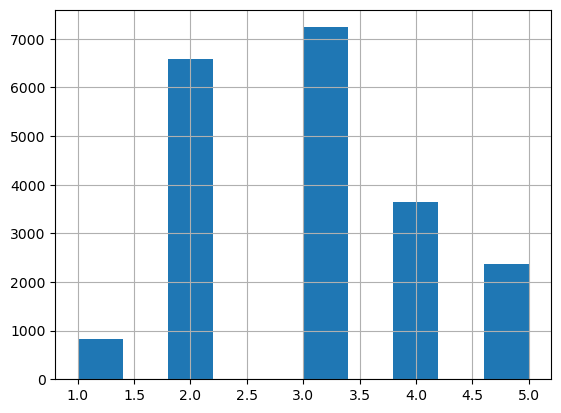

In [34]:
import numpy as np
housing['income_cat']=pd.cut(housing['median_income'],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])
housing['income_cat'].hist()

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [36]:
strat_train_set['income_cat'].value_counts()/len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [37]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop(['income_cat'], axis=1, inplace=True)

In [38]:
housing = strat_train_set.copy()

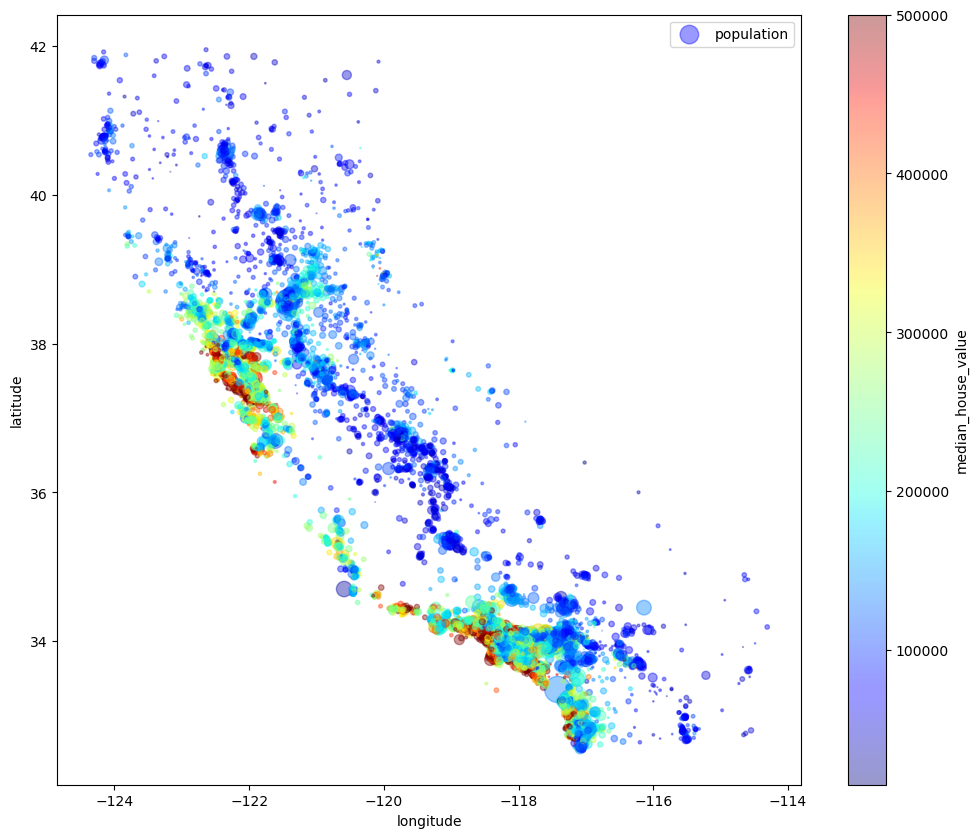

In [39]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
             s=housing['population']/100, c='median_house_value', 
             figsize=(12,10), cmap = plt.get_cmap('jet'), label='population', colorbar=True)
plt.legend()

In [40]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

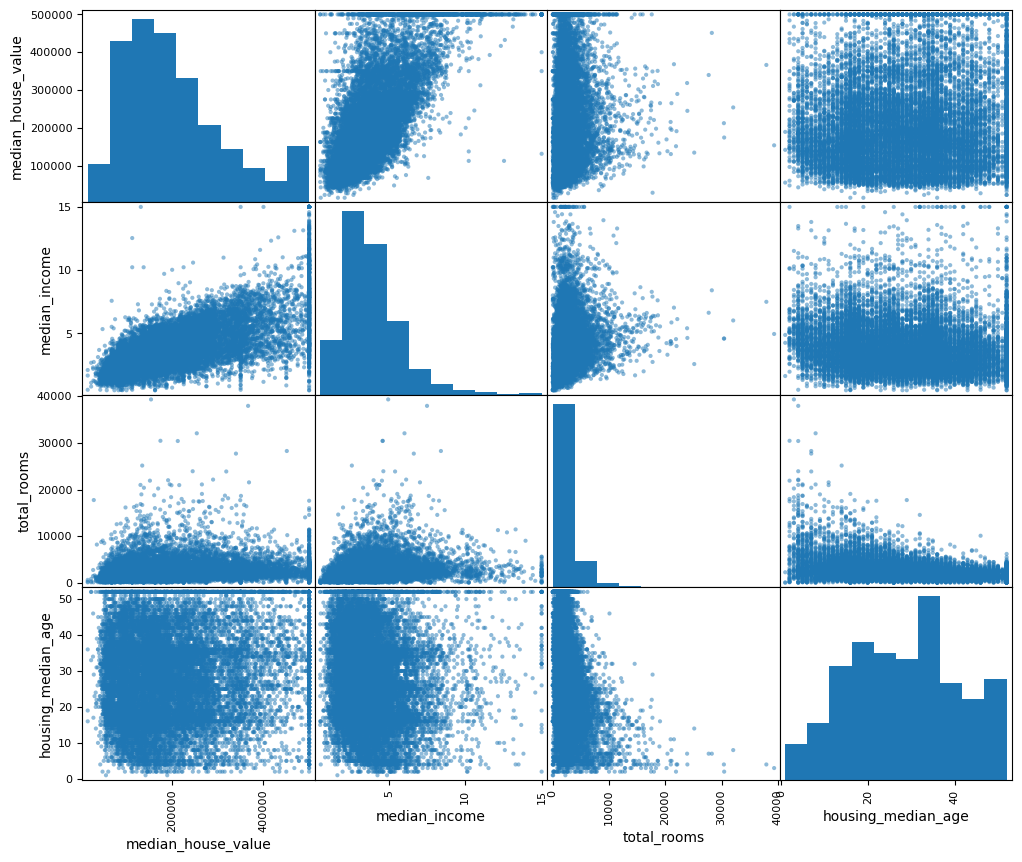

In [41]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,10));

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

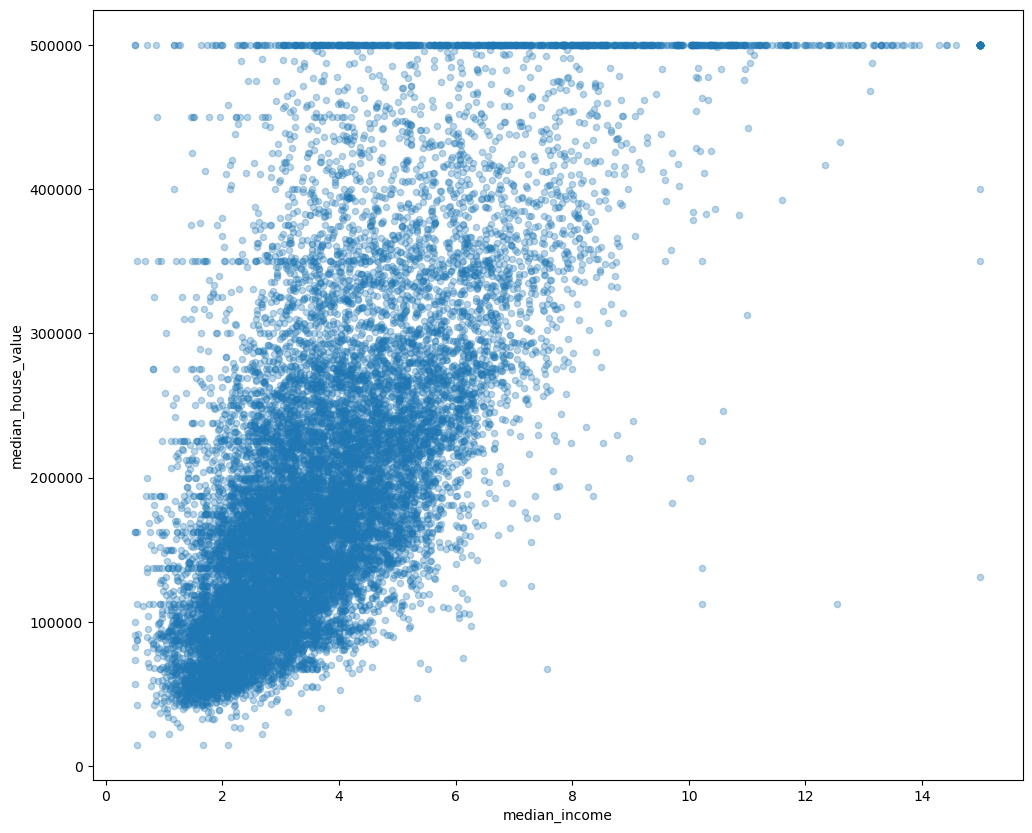

In [42]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', figsize=(12,10), alpha=0.3)

In [43]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [44]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [45]:
housing = strat_train_set.drop(['median_house_value'],axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [46]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [47]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis=1)
X = imputer.fit_transform(housing_num)

In [48]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [49]:
#X = imputer.transform(housing_num)

In [50]:
X

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [51]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [52]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [53]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
label = encoder.fit_transform(housing_cat)
label[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [54]:
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [55]:
from sklearn.preprocessing import OneHotEncoder
scnd_encoder = OneHotEncoder()
label_2 = scnd_encoder.fit_transform(housing_cat)
label_2.toarray()[:10]

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [56]:
scnd_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [57]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedroom_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:,rooms_ix]/X[:,households_ix]
        population_per_household = X[:,population_ix]/X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedroom_per_room = X[:,bedroom_ix]/X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedroom_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [58]:
np.c_?

In [59]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])
# housing_num_tr = num_pipeline.fit_transform(housing_num)

In [61]:
from sklearn.compose import ColumnTransformer

num_attr = list(housing_num)
cat_attr = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attr),
    ('cat', OneHotEncoder(), cat_attr)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [62]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [63]:
housing_prepared[:2]

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ]])

In [64]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [65]:
df = housing.copy()

df['income_cat']=pd.cut(housing['median_income'], bins=[0.,1.5,3.0,4.5,6.0,np.inf], labels=[1,2,3,4,5])
strs , stes= train_test_split(df, test_size=0.2, random_state=42, stratify=df['income_cat'])
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

def income_cat_proportions(data):
    return data['income_cat'].value_counts()/len(data)

comp_proportions = pd.DataFrame({
    "Overall %":income_cat_proportions(df),
    "Stratified %":income_cat_proportions(stes),
    "Random %":income_cat_proportions(test_data)
}).sort_index()

comp_proportions.index.name = "Income Category"
comp_proportions['Stratified Error %']=(comp_proportions['Stratified %']/comp_proportions['Overall %'] -1)
comp_proportions['Random Error %']=(comp_proportions['Random %']/comp_proportions['Overall %'] -1)

(comp_proportions*100).round(2)

,Overall %,Stratified %,Random %,Stratified Error %,Random Error %
Income Category,,,,,
1,3.98,4.00,3.88,0.44,-2.61
2,31.89,31.88,31.55,-0.02,-1.06
3,35.06,35.06,35.63,-0.00,1.64
4,17.63,17.62,17.50,-0.05,-0.74
5,11.45,11.44,11.44,-0.02,-0.02


In [66]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [67]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:",lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [68]:
from sklearn.metrics import mean_squared_error
housing_prediction = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [69]:
from sklearn.metrics import mean_squared_error
mean_squared_error?

In [70]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [71]:
housing_prediction = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_prediction)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [72]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)

tree_rmse = np.sqrt(-scores)
tree_rmse

array([73382.78998279, 70360.1105128 , 67350.86109449, 71794.10870327,
       71557.11619434, 77185.61055098, 70018.77580621, 73736.55978124,
       68239.62433524, 72937.85015104])

In [73]:
def display_scores(scores):
    print("Scores:",scores.round(2))
    print("Mean:", scores.mean())
    print("STD:", scores.std())
    
display_scores(tree_rmse)

Scores: [73382.79 70360.11 67350.86 71794.11 71557.12 77185.61 70018.78 73736.56
 68239.62 72937.85]
Mean: 71656.34071123977
STD: 2722.5868666687356


In [74]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76 64114.99 67771.17 68635.19 66846.14 72528.04 73997.08 68802.34
 66443.29 70139.8 ]
Mean: 69104.07998247063
STD: 2880.3282098180657


In [75]:
from sklearn.ensemble import RandomForestRegressor
ran_reg = RandomForestRegressor()
ran_reg.fit(housing_prepared, housing_labels)

ran_scores = cross_val_score(ran_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)

ran_rmse = np.sqrt(-ran_scores)
display_scores(ran_rmse)

Scores: [51423.28 48791.1  47113.21 51940.64 47663.65 51762.13 52629.47 49536.63
 48544.67 53951.6 ]
Mean: 50335.63851830117
STD: 2188.284425495825


In [76]:
housing_prediction = ran_reg.predict(housing_prepared)
forest_rmse = np.sqrt(mean_squared_error(housing_labels, housing_prediction))

In [77]:
forest_rmse

18610.013380902838

In [78]:
import pickle
pickle.dump(lin_reg, open('lin_reg.sav', 'wb'))
pickle.dump(tree_reg, open('dec_tree_reg.sav', 'wb'))
pickle.dump(ran_reg, open('ran_forest_reg.sav', 'wb'))

#loaded_model = pickle.load(open(filename, 'rb'))

In [79]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [80]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [81]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [82]:
cvres = grid_search.cv_results_
for mean_scores, params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_scores), params)

63444.11699987674 {'max_features': 2, 'n_estimators': 3}
55424.10747676656 {'max_features': 2, 'n_estimators': 10}
52959.887984832654 {'max_features': 2, 'n_estimators': 30}
60441.17532158443 {'max_features': 4, 'n_estimators': 3}
52382.66756301255 {'max_features': 4, 'n_estimators': 10}
50486.46687757892 {'max_features': 4, 'n_estimators': 30}
60425.8722277278 {'max_features': 6, 'n_estimators': 3}
52114.8991169937 {'max_features': 6, 'n_estimators': 10}
49873.86996525723 {'max_features': 6, 'n_estimators': 30}
58408.193462448995 {'max_features': 8, 'n_estimators': 3}
51891.20980871745 {'max_features': 8, 'n_estimators': 10}
50324.66655627044 {'max_features': 8, 'n_estimators': 30}
62164.26296518136 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54199.32496498012 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60391.04527039364 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52485.85003765096 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

In [83]:
cvres

{'mean_fit_time': array([0.17269764, 0.43592505, 1.26921148, 0.16518583, 0.56312909,
        1.69364586, 0.26796536, 0.78164978, 2.66003132, 0.28669109,
        1.20775971, 3.01378722, 0.22670884, 0.67167335, 0.27423425,
        0.66904316, 0.25545125, 0.84211898]),
 'std_fit_time': array([0.04772964, 0.09616397, 0.19212355, 0.01249337, 0.02971354,
        0.18444189, 0.06169878, 0.02656209, 0.33727672, 0.0218958 ,
        0.27889343, 0.16240959, 0.06344361, 0.12320141, 0.08588814,
        0.0221514 , 0.00880064, 0.03154433]),
 'mean_score_time': array([0.01296625, 0.01631036, 0.05832744, 0.00466661, 0.01730399,
        0.0469842 , 0.00579438, 0.0127244 , 0.05468812, 0.00252008,
        0.01692052, 0.04622669, 0.00864949, 0.01734362, 0.0059988 ,
        0.01621699, 0.00675402, 0.01653347]),
 'std_score_time': array([0.0049392 , 0.00151233, 0.01699069, 0.00365162, 0.00313427,
        0.00757375, 0.00149889, 0.00323511, 0.01891627, 0.00231554,
        0.00491219, 0.00681121, 0.00370705, 

In [84]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [85]:
num_attr

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [86]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([7.41485301e-02, 6.79565139e-02, 4.35942395e-02, 1.69396713e-02,
       1.63265740e-02, 1.76870079e-02, 1.58177575e-02, 3.08835123e-01,
       6.20242718e-02, 1.07548691e-01, 8.67500523e-02, 1.60223089e-02,
       1.55237329e-01, 8.94888958e-05, 6.12289876e-03, 4.89954226e-03])

In [89]:
extra_attribs = ['rooms_per_hhold','pop_per_hhold','bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attr + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importance,attributes), reverse=True)

[(0.3088351228535117, 'median_income'),
 (0.15523732873325768, 'INLAND'),
 (0.10754869140190482, 'pop_per_hhold'),
 (0.08675005228657798, 'bedrooms_per_room'),
 (0.07414853014765668, 'longitude'),
 (0.06795651394921318, 'latitude'),
 (0.062024271765830856, 'rooms_per_hhold'),
 (0.04359423947292046, 'housing_median_age'),
 (0.01768700787898204, 'population'),
 (0.016939671306231655, 'total_rooms'),
 (0.016326573969036633, 'total_bedrooms'),
 (0.016022308851792535, '<1H OCEAN'),
 (0.01581775746234931, 'households'),
 (0.00612289876027471, 'NEAR BAY'),
 (0.00489954226468783, 'NEAR OCEAN'),
 (8.948889577204239e-05, 'ISLAND')]

In [90]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value']

X_test_prepared = full_pipeline.fit_transform(X_test)
final_prediction = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_prediction)
final_rmse = np.sqrt(final_mse)
final_rmse

65742.91258119901